In [1]:
import pandas as pd
import numpy as numpy

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data= pd.read_csv("../data/sierraleone-bumbuna.csv")
data.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
#To get the Summary Statistics 
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


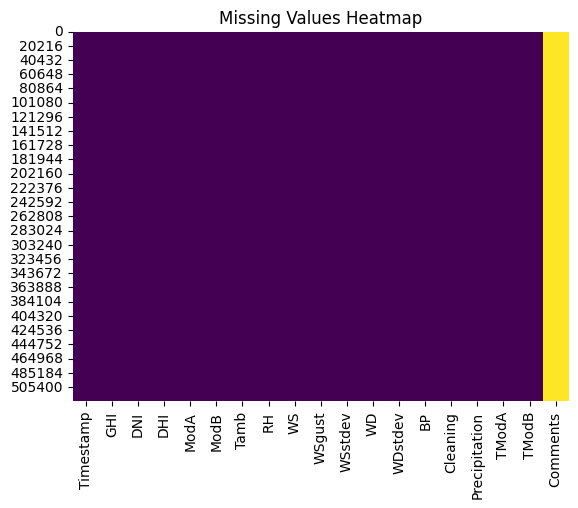

In [5]:
# Data quality check
missing_data = data.isnull().sum()
print(missing_data)

# to Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [6]:
from scipy.stats import zscore

z_scores = zscore(data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']])
outliers = (abs(z_scores) > 3) 
print(outliers)

          GHI    DNI    DHI   ModA   ModB     WS  WSgust
0       False  False  False  False  False  False   False
1       False  False  False  False  False  False   False
2       False  False  False  False  False  False   False
3       False  False  False  False  False  False   False
4       False  False  False  False  False  False   False
...       ...    ...    ...    ...    ...    ...     ...
525595  False  False  False  False  False  False   False
525596  False  False  False  False  False  False   False
525597  False  False  False  False  False  False   False
525598  False  False  False  False  False  False   False
525599  False  False  False  False  False  False   False

[525600 rows x 7 columns]


c:\Users\oumer\Desktop\kifiya-week0\Kifiya-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


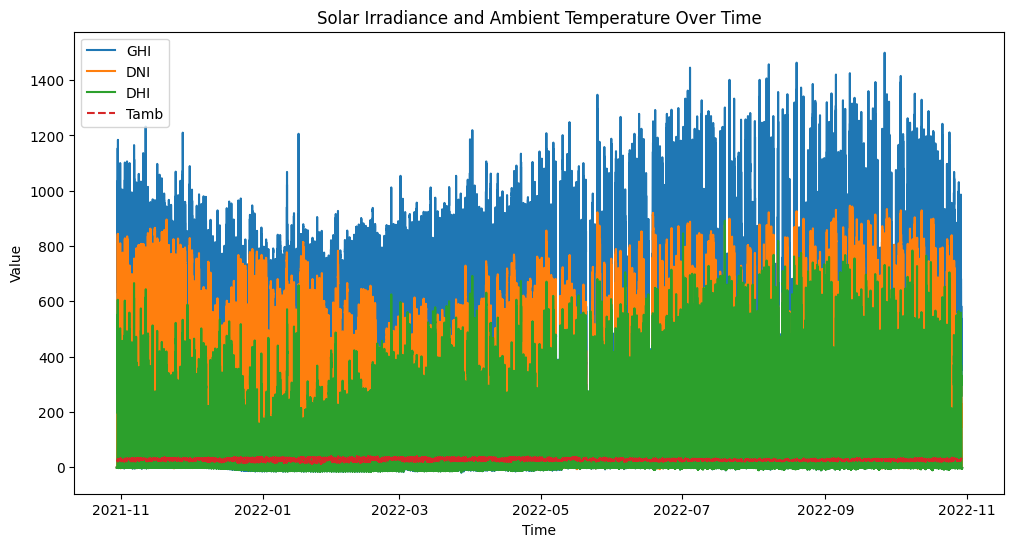

In [7]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['GHI'], label='GHI')
plt.plot(data.index, data['DNI'], label='DNI')
plt.plot(data.index, data['DHI'], label='DHI')
plt.plot(data.index, data['Tamb'], label='Tamb', linestyle='--')
plt.legend()
plt.title('Solar Irradiance and Ambient Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

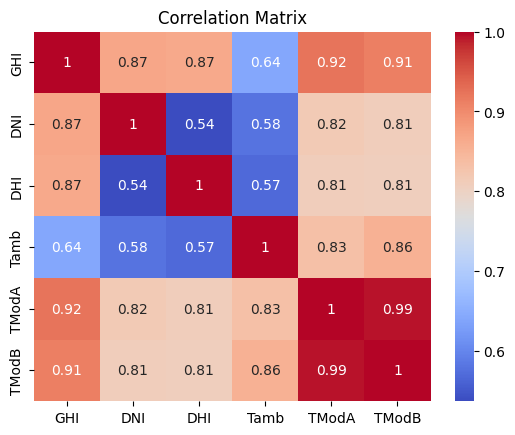

In [8]:
#Correlation between solar radiation and temperature
corr_matrix = data[['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

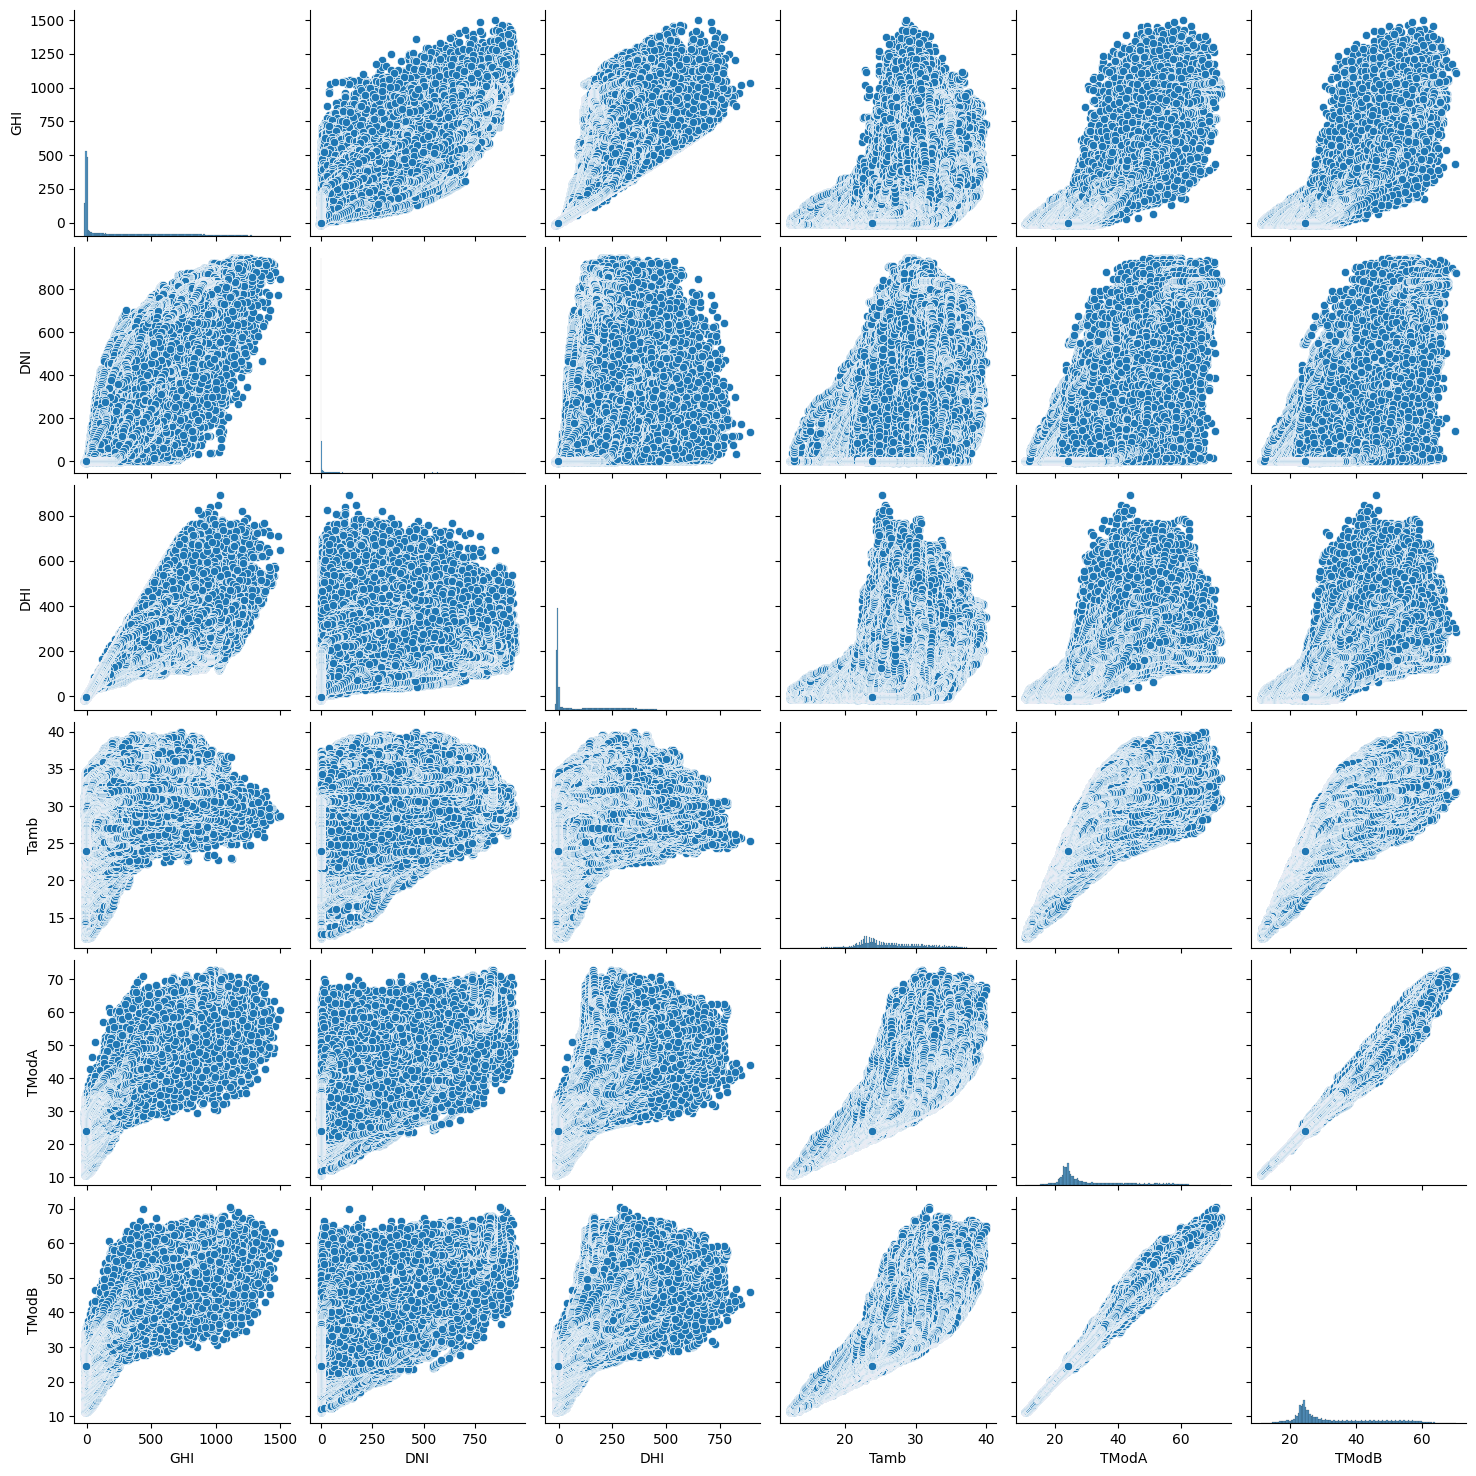

In [9]:
# Pair plot for solar and temperature variables:
sns.pairplot(data[['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB']])
plt.show()

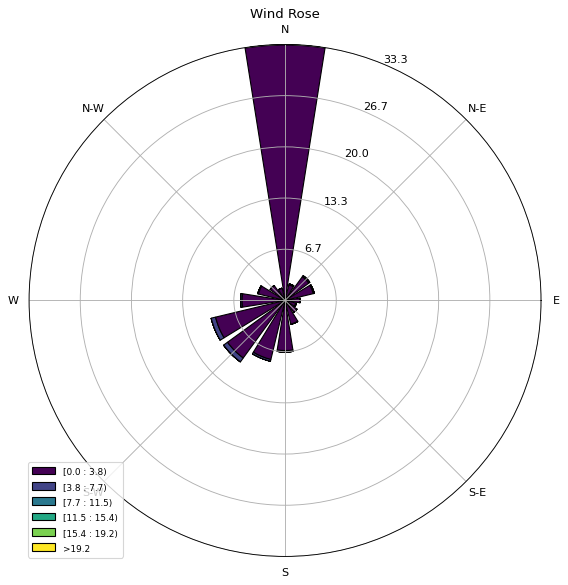

In [10]:
#wind analysis
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(data['WD'], data['WS'], normed=True, opening=0.8, edgecolor='black')
ax.set_title('Wind Rose')
ax.set_legend()
plt.show()

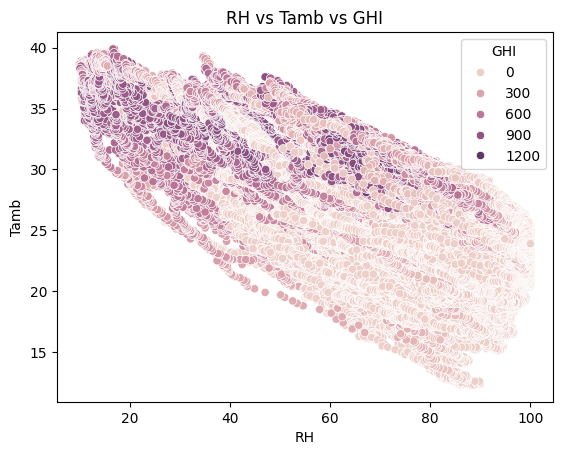

In [11]:
#Temperature Analysis
sns.scatterplot(data= data, x='RH', y='Tamb', hue='GHI')
plt.title("RH vs Tamb vs GHI")
plt.show()


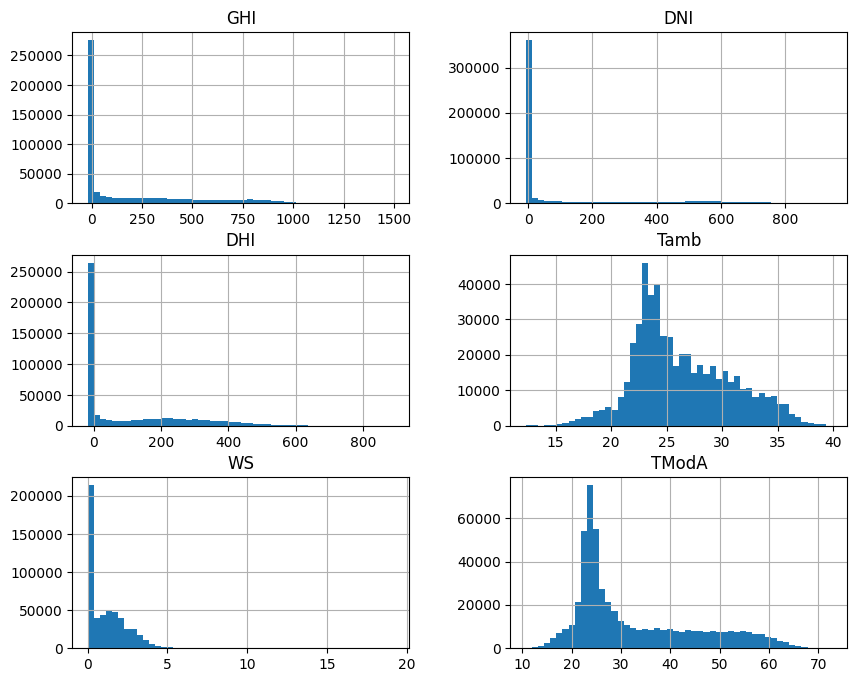

In [12]:
# Histograms

data [['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'TModA']].hist(bins=50, figsize=(10, 8))
plt.show()

In [14]:
# Z-Score Analysis --based on Z-scores we identify  outliers 
from scipy.stats import zscore

z_scores = zscore(data [['GHI', 'DNI', 'DHI', 'ModA', 'ModB']])
outliers = (abs(z_scores) > 3)
print(outliers.sum())

GHI     2477
DNI     7586
DHI     2986
ModA    1604
ModB    2041
dtype: int64


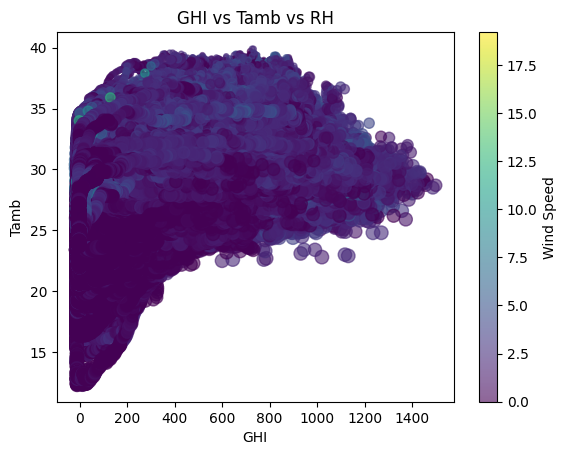

In [15]:
# Bubble charts
plt.scatter(data['GHI'], data['Tamb'], s=data['RH'], alpha=0.6, c=data['WS'], cmap='viridis')
plt.colorbar(label="Wind Speed")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Tamb vs RH")

plt.show()

In [18]:
# Fill missing values with mean for numeric columns
data.fillna(data.mean(), inplace=True)
# Drop entirely null columns
data = data.dropna(axis=1, how='all')
# Remove invalid values like negative numbers
data = data[(data['GHI'] >= 0) & (data['DNI'] >= 0) & (data['DHI'] >= 0)]